In [1]:
# Import dependencies
# API dependencie(s)
import requests
import json

# Data dependencie(s)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pip librarie(s)
from citipy import citipy

# Import API key (.gitignore file)
from keys import api_key

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lat = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list, as well as the associated latitude
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])

# Create a dictionary of city and latitude pairs
cities_lat_dict = dict(zip(cities, city_lat))

In [3]:
# API scraping
# Initialize dictionary to store values 
result = {}

# Begin data retieval for each random city
print("Beginning Data Retrieval")
print("-----------------------------")
for index, val in enumerate(cities):
    # Begin exception handling in case city data is not recorded in the data base
    try:
        # Make an API call
        query = f"http://api.openweathermap.org/data/2.5/weather?q={val}&appid={api_key}"
        json_response = requests.get(query).json()

        # Collect temperature data from api (API returns temp in K)
        temp_K = json_response["main"]["temp"]
        temp_F = (9/5) * (temp_K - 273) + 32

        # Collect humidity data (API return a percentage)
        humidity = json_response["main"]["humidity"]

        # Collect cloudiness data (API return a percentage)
        cloudiness = json_response["clouds"]["all"]

        # Collect Wind speed data (API provides units in m/s)
        wind_speed_m_s = json_response["wind"]["speed"]
        wind_speed_mph = wind_speed_m_s * 2.2369

        # Create a dictionary of the cities mapped to these scraped values
        result[val] = [temp_F, humidity,cloudiness,wind_speed_mph]
        
        # Print success of retrieval to notebook
        print(f"Processing City {index+1} ({val})")   
        
    # Print retrieval outcome to     
    except KeyError:
        print(f"There is no data for city {index+1} ({val}). Skipping")

Beginning Data Retrieval
-----------------------------
Processing City 1 (butaritari)
Processing City 2 (barysh)
There is no data for city 3 (toliary). Skipping
Processing City 4 (east london)
Processing City 5 (vila)
Processing City 6 (albany)
Processing City 7 (sorland)
Processing City 8 (cape town)
Processing City 9 (lagoa)
Processing City 10 (yellowknife)
Processing City 11 (codrington)
Processing City 12 (marawi)
Processing City 13 (nome)
Processing City 14 (sangar)
Processing City 15 (dikson)
Processing City 16 (mahebourg)
There is no data for city 17 (illoqqortoormiut). Skipping
Processing City 18 (carnarvon)
Processing City 19 (arman)
Processing City 20 (laiwu)
Processing City 21 (upernavik)
Processing City 22 (fairbanks)
Processing City 23 (grafton)
Processing City 24 (punta arenas)
Processing City 25 (vaini)
Processing City 26 (arraial do cabo)
Processing City 27 (lorengau)
Processing City 28 (son la)
Processing City 29 (port elizabeth)
Processing City 30 (busselton)
Processi

Processing City 249 (alugan)
Processing City 250 (cibitoke)
Processing City 251 (doha)
Processing City 252 (lasa)
Processing City 253 (ypsonas)
Processing City 254 (carutapera)
There is no data for city 255 (mys shmidta). Skipping
Processing City 256 (fairmont)
Processing City 257 (machilipatnam)
Processing City 258 (ostrovnoy)
Processing City 259 (lazaro cardenas)
Processing City 260 (uyemskiy)
Processing City 261 (padang)
Processing City 262 (damietta)
Processing City 263 (shenkursk)
Processing City 264 (marzuq)
Processing City 265 (esperance)
There is no data for city 266 (krasnoselkup). Skipping
Processing City 267 (alto parana)
Processing City 268 (sitka)
Processing City 269 (livramento)
Processing City 270 (khasan)
Processing City 271 (dickinson)
Processing City 272 (matamoros)
Processing City 273 (majenang)
There is no data for city 274 (mikonos). Skipping
Processing City 275 (bilibino)
Processing City 276 (luderitz)
Processing City 277 (baker city)
Processing City 278 (rio gall

Processing City 494 (kotelnikovo)
Processing City 495 (lucea)
Processing City 496 (charleville)
Processing City 497 (poya)
There is no data for city 498 (kapoeta). Skipping
Processing City 499 (awbari)
Processing City 500 (bako)
There is no data for city 501 (umzimvubu). Skipping
Processing City 502 (gorele)
Processing City 503 (ozernovskiy)
Processing City 504 (kempsey)
Processing City 505 (ixtapa)
Processing City 506 (dafeng)
Processing City 507 (bela)
Processing City 508 (kisesa)
Processing City 509 (northam)
Processing City 510 (gao)
Processing City 511 (yongzhou)
Processing City 512 (mittagong)
Processing City 513 (lata)
Processing City 514 (cloquet)
Processing City 515 (agudos)
Processing City 516 (takoradi)
Processing City 517 (ayan)
Processing City 518 (otane)
Processing City 519 (port macquarie)
Processing City 520 (berlevag)
Processing City 521 (karaton)
Processing City 522 (bethel)
Processing City 523 (vestmanna)
Processing City 524 (ganzhou)
Processing City 525 (kyrylivka)


In [7]:
# Create a data frame that will show all the city data together

# create a list of latitudes from the cities that we would collect data for
processed_lats = []
for key in result:
    processed_lats.append(cities_lat_dict[key])

# Create a data frame out of the result dictionary and processed_lats list
weather_report_df = pd.DataFrame.from_dict(result, orient='index')
weather_report_df["Latitude"] = processed_lats

# Clean up data frame
weather_report_df = weather_report_df.rename(columns ={0:"Temperature (F)",1:"Humidity (%)",\
                                                       2:"Cloudiness (%)", 3:"Wind Speed (mph)"})
weather_report_df["Temperature (F)"] = round(weather_report_df["Temperature (F)"],1)
weather_report_df["Wind Speed (mph)"] = round(weather_report_df["Wind Speed (mph)"],1)

# print head of data frame to notebook
weather_report_df.head()

,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude
butaritari,77.4,100,92,13.2,25.762214
barysh,19.8,87,64,10.2,53.696776
east london,71.3,100,92,11.4,-86.804597
vila,38.5,65,0,6.9,-17.129367
albany,36.6,55,90,5.8,-41.942038


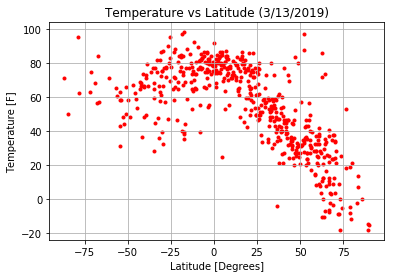

In [35]:
# Create a scatter plot of the Temperature vs the Latitude
plt.scatter(weather_report_df['Latitude'],weather_report_df['Temperature (F)'], marker = ".", color = "red")
plt.xlabel("Latitude [Degrees]")
plt.ylabel("Temperature [F]")
plt.title("Temperature vs Latitude (3/13/2019)")
plt.grid()
plt.savefig("temp_vs_lat.png") # save plt as png to directory

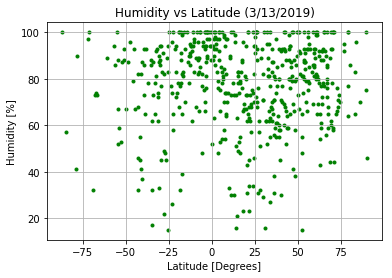

In [36]:
# Create a scatter plot of the Humidity vs the Latitude
plt.scatter(weather_report_df['Latitude'],weather_report_df['Humidity (%)'], marker = ".", color = "green")
plt.xlabel("Latitude [Degrees]")
plt.ylabel("Humidity [%]")
plt.title("Humidity vs Latitude (3/13/2019)")
plt.grid()
plt.savefig("humidity_vs_lat.png") # save plt as png to directory

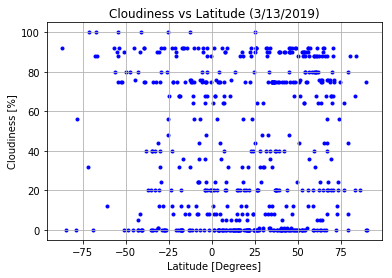

In [43]:
# Create a scatter plot of the Cloudiness vs the Latitude
plt.scatter(weather_report_df['Latitude'],weather_report_df['Cloudiness (%)'], marker = ".", color = "blue")
plt.xlabel("Latitude [Degrees]")
plt.ylabel("Cloudiness [%]")
plt.title("Cloudiness vs Latitude (3/13/2019)")
plt.grid()
plt.savefig("cloudiness_vs_lat.png") # save plt as png to directory

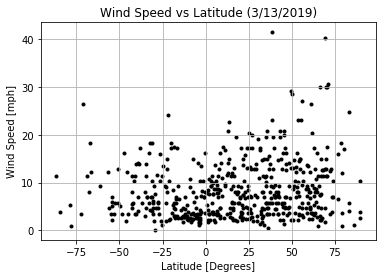

In [42]:
# Create a scatter plot of the Wind Speed vs the Latitude
plt.scatter(weather_report_df['Latitude'],weather_report_df['Wind Speed (mph)'], marker = ".", color = "black")
plt.xlabel("Latitude [Degrees]")
plt.ylabel("Wind Speed [mph]")
plt.title("Wind Speed vs Latitude (3/13/2019)")
plt.grid()
plt.savefig("wind_speed_vs_lat.png") # save plt as png to directory

In [12]:
# Perform once at the end of notebook
plt.show()